# Project Three

https://classroom.github.com/a/feP-p3J8

#### Set-up

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Optical Character Recognition

As a prototypical image analysis and categorization task we look at identifying the correct digit (0..9) in digital images of handwritten digits. For this project we'll use the digits dataset built into sklearn. In future projects we will the use the MNIST data set of handwritten digits which consists of larger images (28x28 pixels) and contains more samples (>50000).

#### sklearn digits dataset

In [2]:
from sklearn.datasets import load_digits

### a) Describe and visualize the data, for example how many samples, feature and target  dimensionality?  Visualize some of the digits (<=100). 

In [3]:
data = load_digits()
print(data['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

Data is a set of 1797 images of digitized handwritten digits. Each image is stored as a flattened 8x8 pixel array of 64 pixel intensities. This means that each image has 64 dimensions (which we will try to reduce later). There are 10 target classes, representing which digit is in the image: 0-9. The target space is one dimensional.

Number of handwritten image samples:  1797
Number of pixels in each image:  64


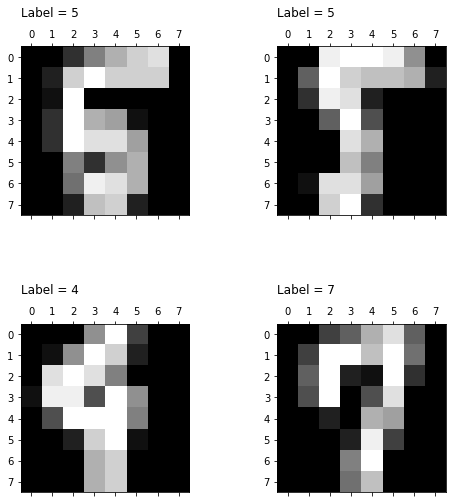

In [4]:
x_data = data['data']
y_data = data['target']

print('Number of handwritten image samples: ', np.shape(x_data)[0])
print('Number of pixels in each image: ', np.shape(x_data)[1])

fig, axes = plt.subplots(nrows=2, ncols=2)

for row in axes:
    for ax in row:
        idx = np.random.randint(0,1000)
        ax.matshow(np.array(x_data[idx,:]).reshape(8,8), cmap='gray')
        ax.set_title('Label = '+str(y_data[idx]),  loc='left', pad=30)

fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)



### b) How useful is it to graph the dependency of the target on each feature or a pair of features as we have done in previous projects?  Read in the textbook and in the sklearn documentation about dimensionality reduction using 

** Principal Component Analysis (PCA)**

* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
* http://scikit-learn.org/stable/modules/decomposition.html

and

** Manifold Learning ** 

* https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
* http://scikit-learn.org/stable/modules/manifold.html


Apply on example each of PCA and Manifold Learning to the digits data set. Keep two dimensions.

## Implement PCA



In [5]:
from matplotlib import cm
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
projected = pca.fit_transform(x_data)

#print(pca.components_)
print('The explained variance values represent the importance of each of the component axes in classifying the dataset:')
print(pca.explained_variance_)

The explained variance values represent the importance of each of the component axes in classifying the dataset:
[179.0069301  163.71774688]


### Visualize classification for PCA reduction of dataset to 2 dimensions.

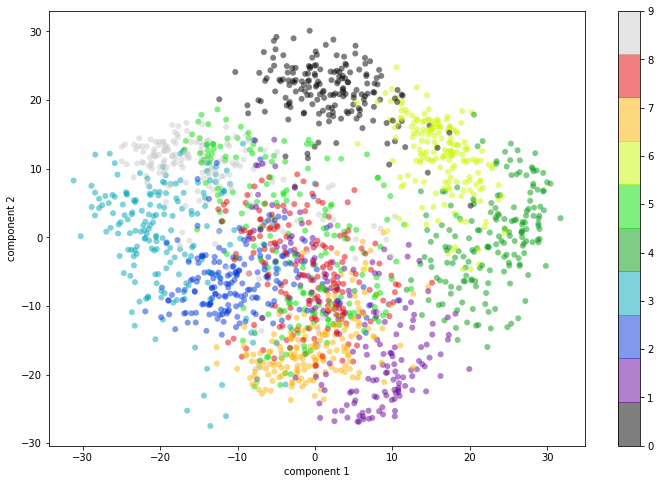

In [6]:
plt.figure(figsize = (12,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_data, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Visualize classification of PCA reduction of dataset to 4 dimensions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a24bd6550>,
      dtype=object)

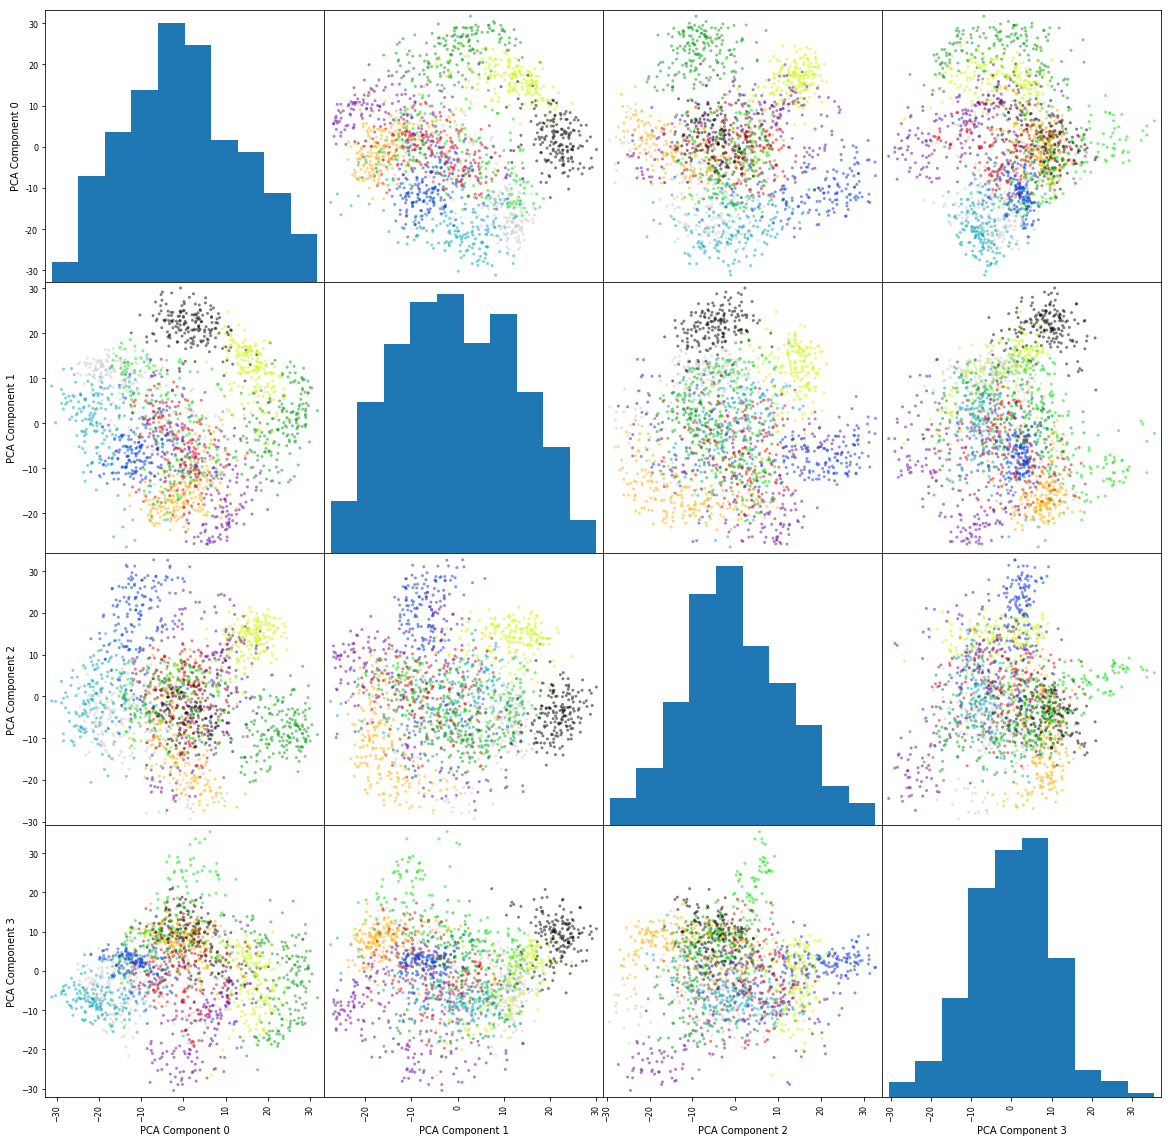

In [7]:
n_components = 4
pca = PCA(n_components)
projected = pca.fit_transform(x_data)

cnames = []
for i in range(n_components):
    cnames.append('PCA Component '+str(i))

df = pd.DataFrame(projected, columns=cnames)
pd.plotting.scatter_matrix(df,figsize=(20,20),c=y_data, grid=True, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))


### Implement Manifold Learning (Isomap)

In [8]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
projected = iso.fit_transform(x_data)


### Visualize classification for Isomap reduction of dataset to 2 dimensions.

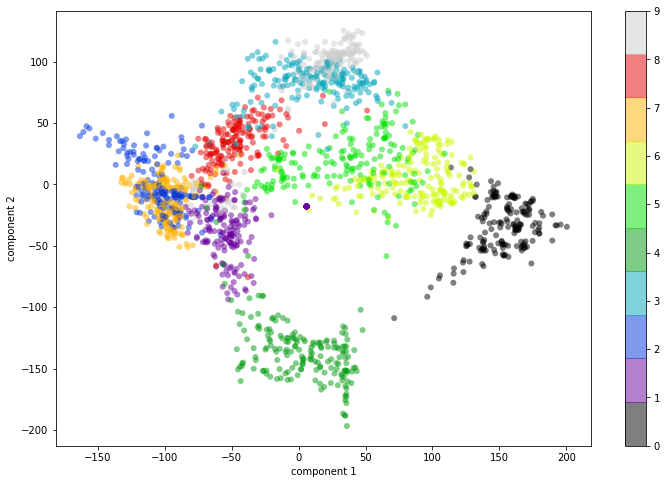

In [9]:
plt.figure(figsize = (12,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_data, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Visualize classification for Isomap reduction of dataset to 4 dimensions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a24bc1c50>,
      dtype=object)

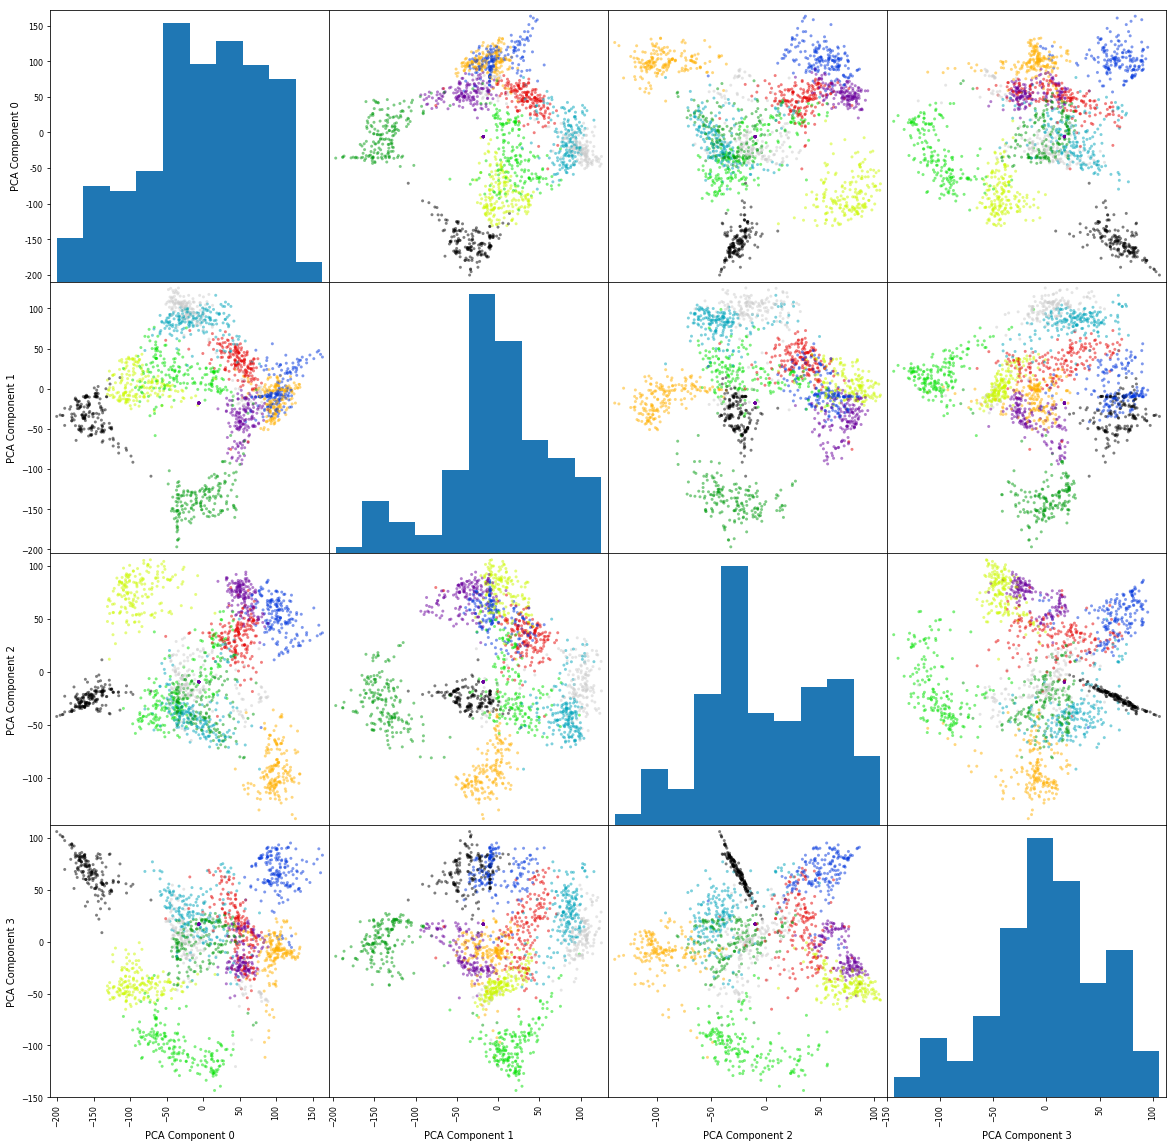

In [10]:
n_components = 4
iso = Isomap(n_components=n_components)
projected = iso.fit_transform(x_data)

cnames = []
for i in range(n_components):
    cnames.append('PCA Component '+str(i))

df = pd.DataFrame(projected, columns=cnames)
pd.plotting.scatter_matrix(df,figsize=(20,20),c=y_data, grid=True, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

### c) Supervised Learning

Apply one of the methods we have looked at so far for supervised learning (for example Support Vector Machines, Decision Trees and Random Forests) to the digits problem. Use model validation and parameter searches as needed. How accurate is your model? Use appropriate measures to describe the accuracy of your model.

In [11]:
from sklearn.model_selection import train_test_split

# split data into training and test set for cross validation
def split(x_data,y_data):
    x_training, x_test, y_training, y_test = train_test_split(x_data, y_data)
    return x_training,y_training,x_test,y_test

# train and test (with cross validation) over n iterations and return the average score.
def rf_avgscore(train_data, n_iter):
    scores = []
    for i in range(n_iter):
        rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
        rfc.fit(train_data[0],train_data[1])
        scores.append(rfc.score(train_data[2],train_data[3]))
    return np.mean(scores)

# reduce dimensions of dataset
def reduce_dim(method, n_components, x_data):
    mth = method(n_components=n_components)
    return mth.fit_transform(x_data)
    

### Implement Random Forest Classifier

#### First, use original dataset without dimensionality reduction

In [18]:
from sklearn.ensemble import RandomForestClassifier
scores = []

train_data = split(x_data,y_data)
score = rf_avgscore(train_data, 50)
print('avg score: ', score)

scores.append(score)

avg score:  0.8422222222222221


#### with PCA reduction to 2 dimensions

In [19]:
train_data = split(projected,y_data)

train_data = split(reduce_dim(PCA,2,x_data),y_data)
score = rf_avgscore(train_data, 50)
print('avg score: ', score)

scores.append(score)

avg score:  0.47555555555555556


#### with Isomap reduction to 2 dimensions

In [20]:
train_data = split(reduce_dim(Isomap,2,x_data),y_data)
score = rf_avgscore(train_data, 50)
print('avg score: ', score)

scores.append(score)

avg score:  0.508888888888889


#### with PCA reduction to 4 dimensions

In [21]:
train_data = split(projected,y_data)

train_data = split(reduce_dim(PCA,4,x_data),y_data)
score = rf_avgscore(train_data, 50)
print('avg score: ', score)

scores.append(score)

avg score:  0.5622222222222222


#### with Isomap reduction to 4 dimensions

In [22]:
train_data = split(reduce_dim(Isomap,4,x_data),y_data)
score = rf_avgscore(train_data, 50)
print('avg score: ', score)

scores.append(score)

avg score:  0.751111111111111


Text(0,0.5,'RF score')

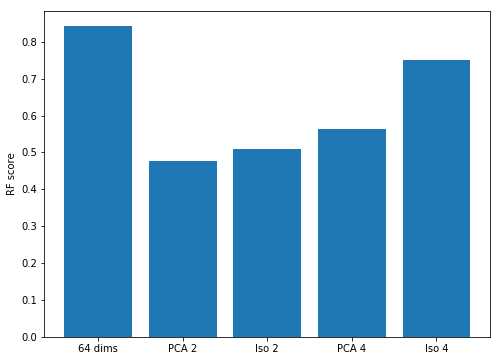

In [23]:
obj = ['64 dims','PCA 2', 'Iso 2', 'PCA 4', 'Iso 4']
y_pos = np.arange(len(obj))
plt.figure(figsize=(8,6))
plt.bar(y_pos, scores, align='center')
plt.xticks(y_pos, obj)
plt.ylabel('RF score')

As is shown in the bar chart above, the highest score for classifying the handwritten digits dataset, using a Random Forest classifier with a depth of 2 and 100 trees, is achieved using the non-reduced data (~85%). The next best score is achieved using Isomap reduction down to 4 dimensions (~75%). Isomap reduction is clearly better than PCA, when it comes to accuracy.

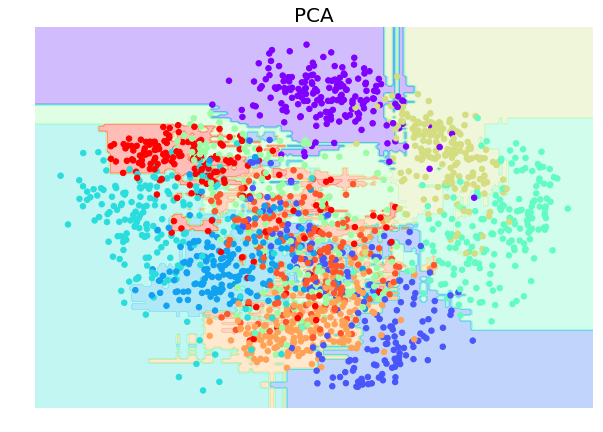

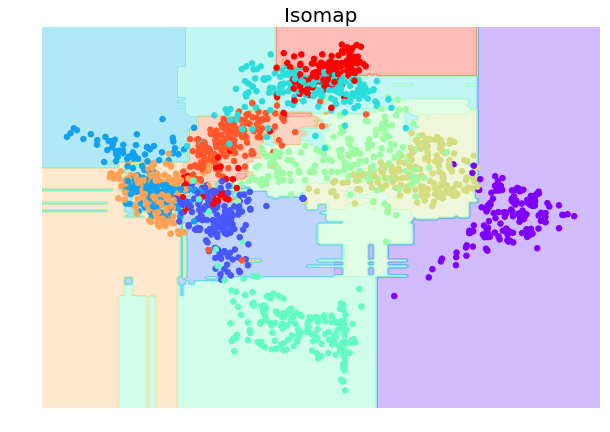

In [49]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

plt.figure(figsize=(10,7))
plt.title('PCA', fontsize=20)
visualize_classifier(RandomForestClassifier(), reduce_dim(PCA,2,x_data), y_data)

plt.figure(figsize=(10,7))
plt.title('Isomap', fontsize=20)
visualize_classifier(RandomForestClassifier(), reduce_dim(Isomap,2,x_data), y_data)

### d) Exploration: Unsupervised Learning

This part is optional. In supervised learning we use labelled data to train or build a model. In the case of the images of handwritten digits each image is label with the (hopefully) correct digit 0..9. Unsupervised learning tries to extract the fact that there are 10 different objects (the digits 0..9) from the images without knowing the labels. Learn in the textbook about

** k-means Clustering*

* https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

and apply some of the techiques to the digits problem.

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(x_data)
y_kmeans = kmeans.predict(x_data)
print(np.shape(y_kmeans))
print(np.shape(y_data))



(1797,)
(1797,)


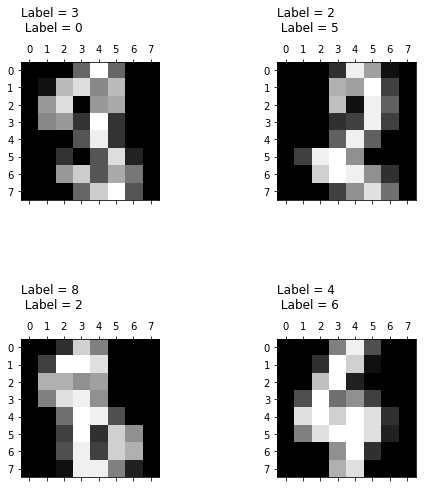

In [31]:

fig, axes = plt.subplots(nrows=2, ncols=2)

for row in axes:
    for ax in row:
        idx = np.random.randint(0,1000)
        ax.matshow(np.array(x_data[idx,:]).reshape(8,8), cmap='gray')
        ax.set_title('Label = '+str(y_data[idx])+'\n Label = '+str(y_kmeans[idx]), 
        loc='left', pad=30)

fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)

(1797,)
(1797,)


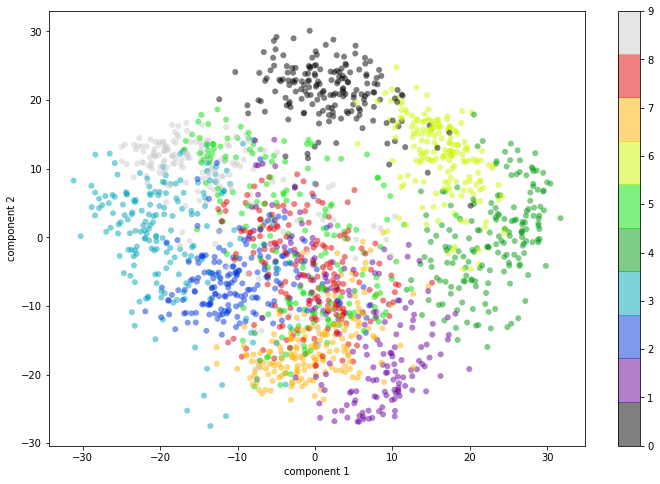

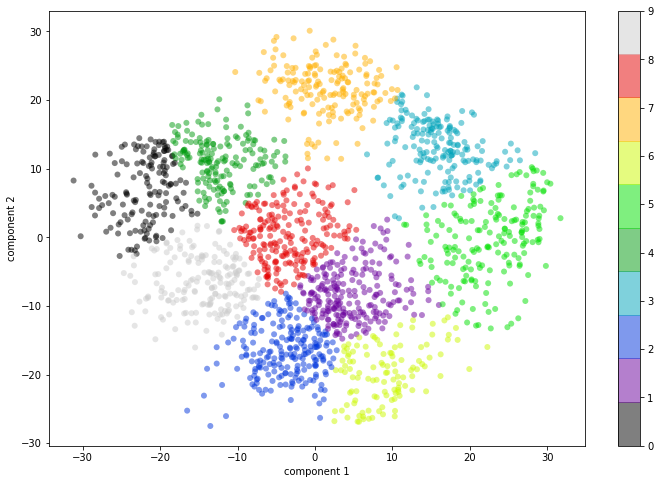

In [34]:
projected = reduce_dim(PCA,2,x_data)

kmeans = KMeans(n_clusters=10)
kmeans.fit(projected)
y_kmeans = kmeans.predict(projected)
print(np.shape(y_kmeans))
print(np.shape(y_data))

plt.figure(figsize = (12,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_data, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

plt.figure(figsize = (12,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_kmeans, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();